<h1> Entrenamiento y optimización de Modelos de Machine Learning </h1>
<h3> Entega final del proyecto: </h3> 
<h4> Sergio Andres Rios Gomez </h4>

<h2> 1. Definición de objetivo </h2>
<p> Hacer uso eficiente de la información transaccional con el fin de optimizar los procesos internos y desarrollar oportunidades de crecimiento en una empresa dedicada a prestar los servicios tecnologicos y transaccionales a entidades del sector Cooperativo y solidacio  </p> 

<h2> 2. Contexto comercial</h2>
<p> Los sistemas de pago de bajo valor SPBV, son mecanismos de funcionamiento de la economía moderna, donde participa un originador (Pagador) y un beneficiario (receptor) de los recursos. Ante el alto volumen de pagos y la necesidad de automatizar estas transacciones nacen compañias especializadas en realizar toda esta intermediación. </p>

<p> La empresa SPBV se encarga de prestar los servicios tecnologicos y transaccionales a las Cooperativas de la red. </p>

<p> La data que será procesada en la presente entrega, corresponse a las transacciones mensuales de la entidad administradora de pagos de bajo valor. La información contiene detalle de los grupos, canales, tipos de transacciones, montos transados y todo lo detallado con cada transacción</p>
 

<h2> 3. Problema comercial </h2>
<p> En la empress SPVB se generan miles de registros transacciones a diario, se pretende dar respuesta con la data del modelo a diferentes necesidades iniciales las cuales son: </p>

<li> 1. Crear un modelo para identificar y predecir las transaccio exitosas y con error</li>
<li> 2. Modelo para inferir el tipo de transacción que pueden realizar los usuarios de la red.</li>
<li> 3. Modelo de regresión lineal para predecir los retiros en efectivo y de esta manera provicionar el cash necesario para cubrir las necesidades de los usuarios.</li>

<h2> 4. Data Acquisition </h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/chech/PC Febrero 2023/1. Data Scients/CoderHouse/Data Scients/FinalProject/data/12. Dic22.csv')
df = pd.DataFrame(df)

C:\Users\chech\AppData\Local\Temp\ipykernel_8080\759653972.py:1: DtypeWarning: Columns (29,34,35,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/chech/PC Febrero 2023/1. Data Scients/CoderHouse/Data Scients/FinalProject/data/12. Dic22.csv')


In [3]:
print("El tamaño del dataset es de: ", df.shape)

El tamaño del dataset es de:  (1131768, 47)


In [4]:
df.dtypes

Secuencia                           object
ID. Transaccion                     object
Nombre Transaccion                  object
BIN                                 object
Tarjeta                             object
ID. Canal                            int64
Nombre Canal                        object
Error                                int64
Nombre Error                        object
Responsable Error                   object
ID. Origen                           int64
Nombre Origen                       object
ID. Grupo                           object
Nombre Grupo                        object
Valor                                int64
Fecha Transaccion                   object
Fecha Contable                     float64
Codigo Entidad Orgien                int64
Codigo Entidad Destino             float64
Cooperativa Terminal                object
ID. Terminal                        object
Nombre Terminal                     object
Serial Terminal                     object
Tipo Cuenta

<h2> 5. Data Wrangling </h2> 

In [5]:
# Missing Data 
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/ df.isnull().count().sort_values(ascending = False)*100)
missing_data = pd.concat([total, percent], axis=1, keys=['total','percent'])
missing_data.head(14)

,total,percent
Cuenta Origen Int.,1131768,100.000000
Nombre Cliente Destino,1112736,98.318383
Documento Origen Int.,1112544,98.301419
Nombre Cliente Destino Interban,1102089,97.377643
Celular Destino,1095211,96.769921
Nombre Banco Destino,1093630,96.630228
Cuenta Destino,1090722,96.373285
Documento Cliente Destino,1081398,95.549441
Codigo Entidad Destino,1074338,94.925638
Servicio Origen Transaccion,1057135,93.405627


<p> Se reduce en Data Frame, eliminando las columnas con más del 78% de datos faltantes, algunas que son redundantes pues brindan la misma información en los modelos y alfunos features que a consideración no generan valor.

In [6]:
df_1 = df[['ID. Transaccion','Nombre Transaccion','BIN','ID. Canal','Nombre Canal','Error','Nombre Error',
           'Responsable Error','ID. Origen','Nombre Origen','ID. Grupo','Nombre Grupo','Valor','Fecha Transaccion','Codigo Entidad Orgien',
           'Cooperativa Terminal','ID. Terminal','Nombre Terminal','Serial Terminal','Tipo Documento',
           'Documento','Departamento','Ciudad']]

<p> Convertir el cambo fecha en dd-mm-aaaa

In [7]:
# Convertir la columna 'Fecha Transaccion' al formato datetime
df_1['Fecha Transaccion'] = pd.to_datetime(df_1['Fecha Transaccion'])

# Extraer el día, mes y año y crear una nueva columna 'Fecha Formateada'
df_1['Fecha Transaccion'] = df_1['Fecha Transaccion'].dt.strftime('%d-%m-%Y')

C:\Users\chech\AppData\Local\Temp\ipykernel_8080\2222691355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Fecha Transaccion'] = pd.to_datetime(df_1['Fecha Transaccion'])
C:\Users\chech\AppData\Local\Temp\ipykernel_8080\2222691355.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Fecha Transaccion'] = df_1['Fecha Transaccion'].dt.strftime('%d-%m-%Y')


In [8]:
# Eliminar las filas con valores no finitos en la columna "Documento"
df_1 = df_1.dropna(subset=['Documento'])

# Convertir los valores en la columna "Documento" de tipo float64 a int64
df_1["Documento"] = df_1["Documento"].astype('int64')

<p> Las transacciones de consulta, registrar valor 0 (cero) en la columna "Valor", con el fin de no mostrar movimientos financieros en transacciones de consultas.

In [9]:
df_1.loc[df_1['Nombre Transaccion'].str.contains('Consul'), 'Valor'] = 0

<p> En la columna valor, poner "0" (cero) a las transacciones que no fueron exitosas, esto con el fin de garantizar que no se sumen en la red valores que realmento no transaron.

In [10]:
# Actualizar los valores de la columna "Valor" según la condición
df_1.loc[df_1['Nombre Error'] != 'Exito', 'Valor'] = 0

In [11]:
# Eliminar filas con valores nulos en 'Departamento' y 'Ciudad'
df_1.dropna(subset=['Departamento', 'Ciudad'], inplace=True)

In [12]:
# Convertir la columna "Departamento" a tipo de dato entero
df_1['Departamento'] = df_1['Departamento'].astype(int)

# Convertir la columna "Ciudad" a tipo de dato entero
df_1['Ciudad'] = df_1['Ciudad'].astype(int)

<h2> 6. Feature Engineering </h2>

<p> 6.1 Función para asignar valores en función de la columna "Error" y crear una nueva columna binaria que indique "1" si la transaccion fue exitosa o "0" si fue error

In [13]:
def asignar_exito(row):
    if row["Error"] == 0 or row["Error"] == 900:
        return 1
    else:
        return 0
df_1["Exito1-0"] = df_1.apply(asignar_exito, axis=1)

<p> 6.2 Con el fin de categorizar las transacciones por rango del valor transado, se crea una nueva columna que indica en que rango esta cada transacción.

In [14]:
def rangos(valor):
    if valor > 100000000:
        return '+ 100 m'
    elif valor > 50000000 and valor <= 100000000:
        return '50 m-100 m'
    elif valor > 20000000 and valor <= 50000000:
        return '20 m-50 m'
    elif valor > 5000000 and valor <= 20000000:
        return '5 m-20 m'
    elif valor > 1000000 and valor <= 5000000:
        return '1 m-5 m'
    elif valor > 200000 and valor <= 1000000:
        return '200-1 m'
    elif valor > 50000 and valor <= 200000:
        return '50-200'
    elif valor > 10000 and valor <= 50000:
        return '10-50'
    elif valor > 1 and valor <= 10000:
        return '1-10'
    else:
        return 'Cero'
df_1['NombreRango'] = df_1['Valor'].apply(rangos)

<h2> 7. Exploratory Data Analysis - EDA </h2>

<p> 7.1 Visualización de valores null en el data frame.

c:\Users\chech\anaconda3\envs\proyectoCoder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\chech\anaconda3\envs\proyectoCoder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\chech\anaconda3\envs\proyectoCoder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\chech\anaconda3\envs\proyectoCoder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

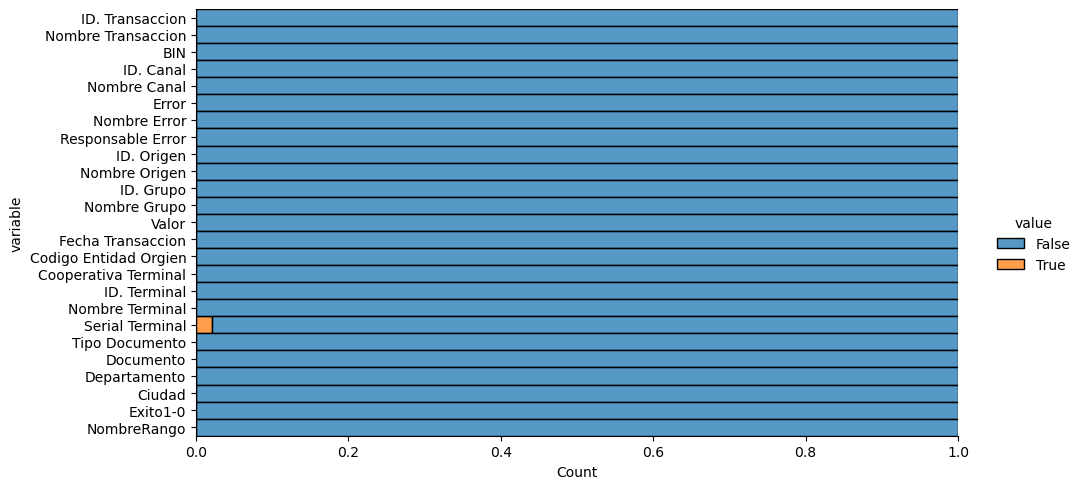

In [15]:
(
    df_1.isnull()
    .melt().pipe(
        lambda i:(
            sns.displot(
                data = i,
                y = 'variable',
                hue = 'value',
                multiple = 'fill',
                aspect = 2
            )
        )
    )
)

<p> 7.2 Porcentaje de trasacciones exitosas Vs Error.

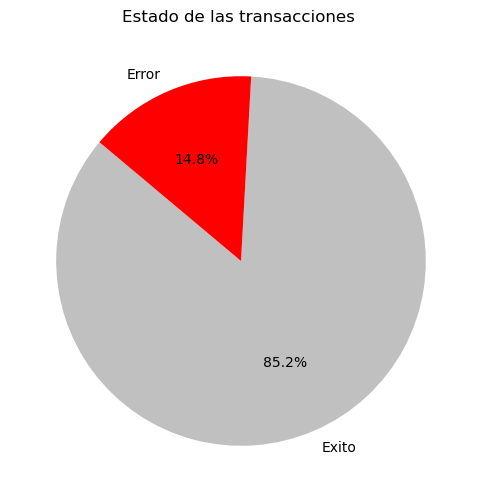

In [16]:
suma_valores = df_1["Exito1-0"].value_counts()

# Crear la gráfica de torta
plt.figure(figsize=(6, 6))
plt.pie(suma_valores, labels=["Exito", "Error"], autopct='%1.1f%%', colors=['silver', 'red'], startangle=140)

plt.title("Estado de las transacciones ")

plt.show()

<p> 7.3 Cantidad de transacciones por rango. Lo cual nos da una idea muy acertada del comportamiento de las transacciones en terminos del valor $

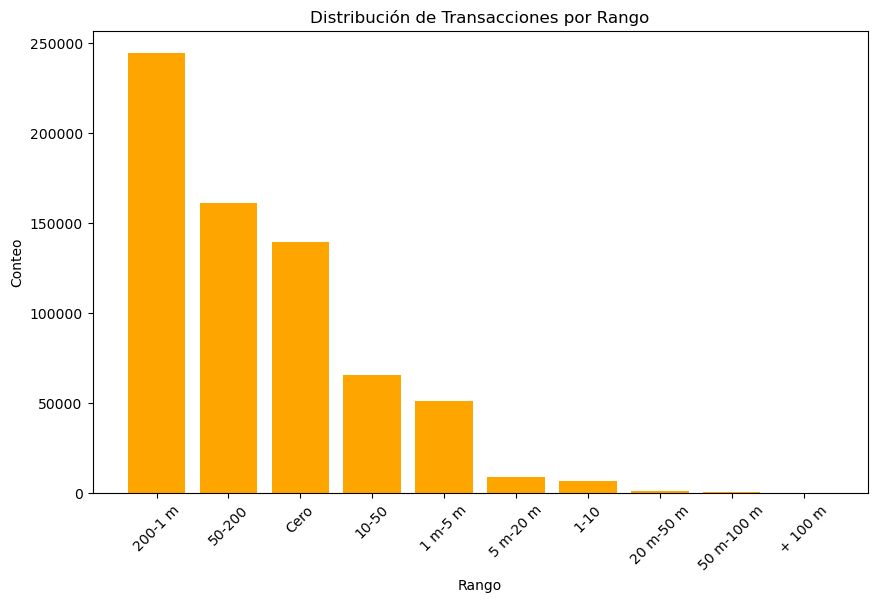

In [17]:
conteo_rangos = df_1['NombreRango'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(conteo_rangos.index, conteo_rangos.values, color='orange')

# Personalizar la gráfica
plt.title('Distribución de Transacciones por Rango')
plt.xlabel('Rango')
plt.ylabel('Conteo')

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=45)
plt.show()

<p> 7.4 Cantidad de transacciones por canal.

c:\Users\chech\anaconda3\envs\proyectoCoder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\chech\anaconda3\envs\proyectoCoder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\chech\anaconda3\envs\proyectoCoder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


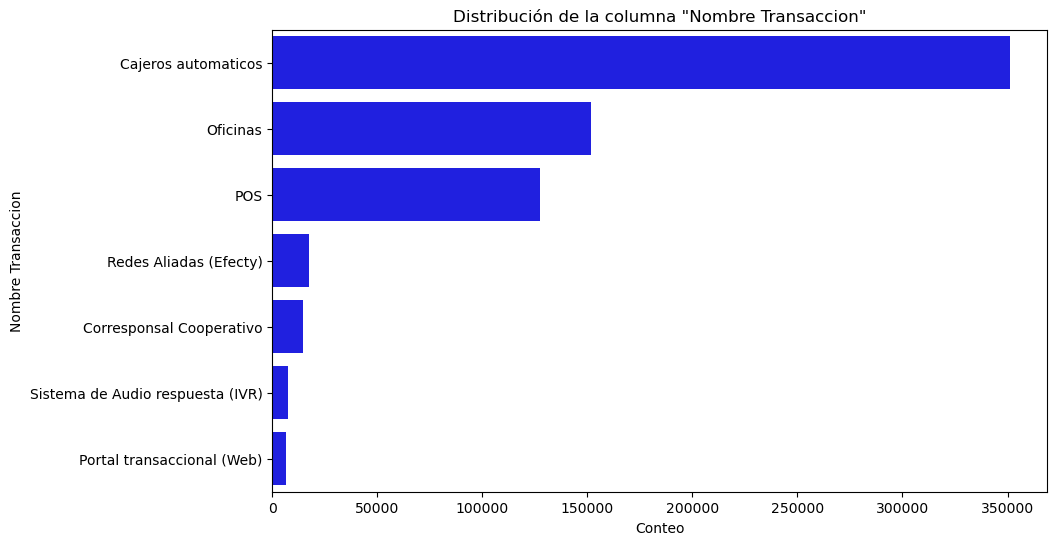

In [18]:
# Seleccionar la columna 'Nombre Transaccion'
nombre_transaccion = df_1['Nombre Canal']

# Contar las ocurrencias de cada valor
conteo_transacciones = nombre_transaccion.value_counts()

# Crear la gráfica de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_transacciones.values, y=conteo_transacciones.index, color='blue')

# Personalizar la gráfica
plt.title('Distribución de la columna "Nombre Transaccion"')
plt.xlabel('Conteo')
plt.ylabel('Nombre Transaccion')

# Mostrar la gráfica
plt.show()

<p> 7.5 Cantidad de transacciones por cada tipo de transacción.

c:\Users\chech\anaconda3\envs\proyectoCoder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\chech\anaconda3\envs\proyectoCoder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\chech\anaconda3\envs\proyectoCoder\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


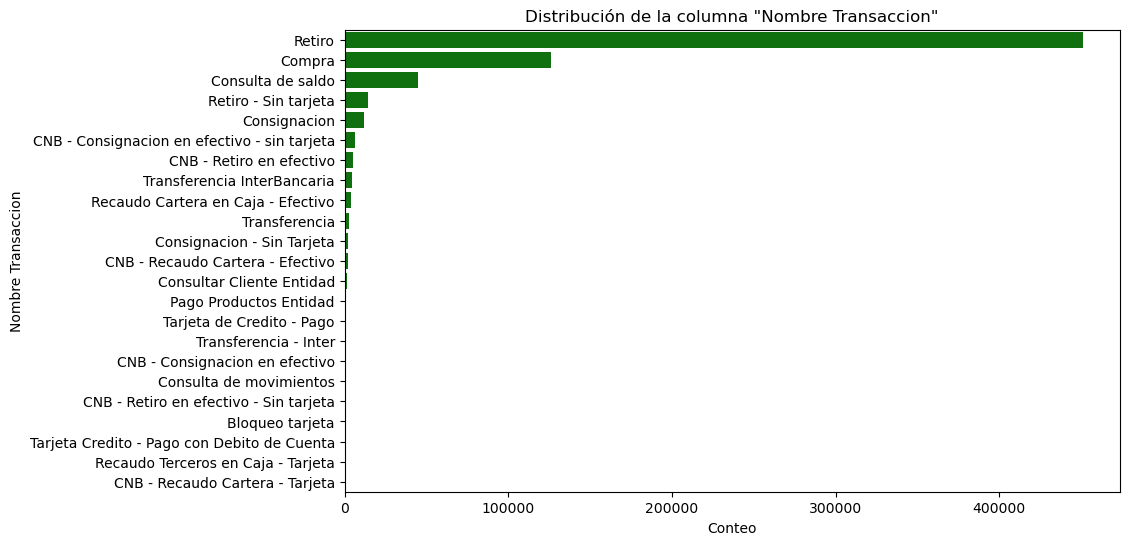

In [19]:
nombre_transaccion = df_1['Nombre Transaccion']

# Contar las ocurrencias de cada valor
conteo_transacciones = nombre_transaccion.value_counts()

# Crear la gráfica de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_transacciones.values, y=conteo_transacciones.index, color='green')

# Personalizar la gráfica
plt.title('Distribución de la columna "Nombre Transaccion"')
plt.xlabel('Conteo')
plt.ylabel('Nombre Transaccion')

# Mostrar la gráfica
plt.show()

<h2> Feature engineering - Segunda parte </h2>
<p> Antes de iniciar con el proceso de modelado, procedemos a continuar haciendo feature engineering, con el fin de tener el dataset lo mejor posible para obtener un buen modelo. 

In [20]:
df_2 = df_1[['ID. Origen','ID. Canal','ID. Transaccion','BIN','Valor','Codigo Entidad Orgien',
             'Departamento', 'Ciudad', 'Error','Exito1-0', 'NombreRango','Tipo Documento','Documento']]
df_2

,ID. Origen,ID. Canal,ID. Transaccion,BIN,Valor,Codigo Entidad Orgien,Departamento,Ciudad,Error,Exito1-0,NombreRango,Tipo Documento,Documento
9,1,2,00,477170,130000,27,25,754,0,1,50-200,CC,91105330
10,1,2,00,477170,0,8,8,758,7104,0,Cero,CC,8771557
11,1,2,00,477170,130000,44,50,1,0,1,50-200,CC,8192908
12,1,2,00,477170,0,8,73,1,1401,0,Cero,CC,65760409
13,1,2,00,477170,0,8,73,1,7104,0,Cero,CC,65760409
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131754,1,2,00,477170,95000,79,13,1,0,1,50-200,CC,41362509
1131756,1,2,00,477170,95000,22,68,1,0,1,50-200,CC,37891679
1131761,1,2,00,477170,95000,7,54,498,0,1,50-200,CC,37334211
1131765,1,2,00,477170,0,155,5,686,7104,0,Cero,CC,32561220


<h4> Label Encoding </h4>
<p> Transformar variables categóricas en variables numéricas. Consiste en asignar un número único a cada categoría en la columna categórica, convirtiendo así las etiquetas en valores enteros.

In [21]:
from sklearn.preprocessing import LabelEncoder

# Columnas para aplicar Label Encoding
columns_to_encode = ['ID. Grupo', 'ID. Transaccion', 'BIN', 'NombreRango', 'Tipo Documento']

# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar Label Encoding a cada columna
for col in columns_to_encode:
    if col in df_2.columns:
        df_2[col] = label_encoder.fit_transform(df_2[col].astype(str))

C:\Users\chech\AppData\Local\Temp\ipykernel_8080\1384564274.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2[col] = label_encoder.fit_transform(df_2[col].astype(str))
C:\Users\chech\AppData\Local\Temp\ipykernel_8080\1384564274.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2[col] = label_encoder.fit_transform(df_2[col].astype(str))
C:\Users\chech\AppData\Local\Temp\ipykernel_8080\1384564274.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [22]:
df_2

,ID. Origen,ID. Canal,ID. Transaccion,BIN,Valor,Codigo Entidad Orgien,Departamento,Ciudad,Error,Exito1-0,NombreRango,Tipo Documento,Documento
9,1,2,0,0,130000,27,25,754,0,1,8,0,91105330
10,1,2,0,0,0,8,8,758,7104,0,9,0,8771557
11,1,2,0,0,130000,44,50,1,0,1,8,0,8192908
12,1,2,0,0,0,8,73,1,1401,0,9,0,65760409
13,1,2,0,0,0,8,73,1,7104,0,9,0,65760409
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131754,1,2,0,0,95000,79,13,1,0,1,8,0,41362509
1131756,1,2,0,0,95000,22,68,1,0,1,8,0,37891679
1131761,1,2,0,0,95000,7,54,498,0,1,8,0,37334211
1131765,1,2,0,0,0,155,5,686,7104,0,9,0,32561220


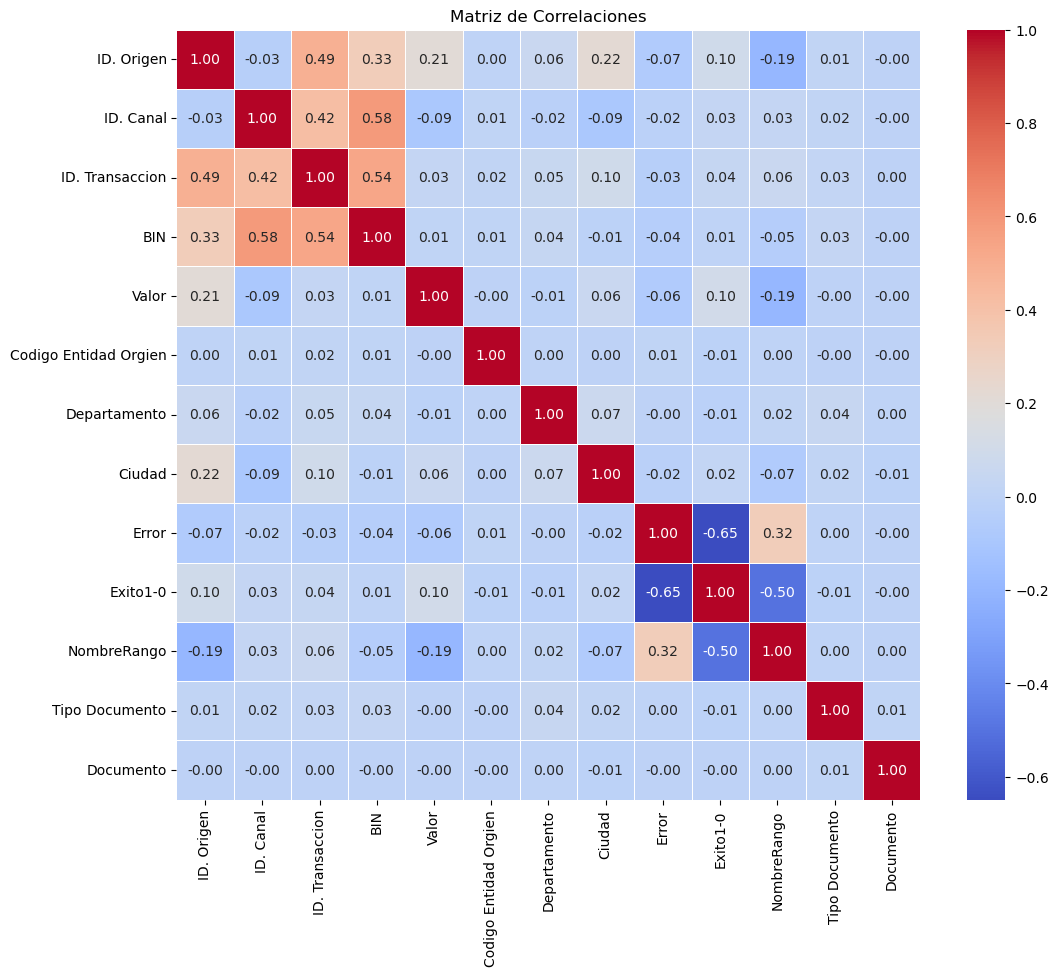

In [23]:
# Seleccionar solo las columnas numéricas
columns_numeric = ['ID. Origen', 'ID. Canal', 'ID. Transaccion', 'BIN',
                   'Valor', 'Codigo Entidad Orgien', 'Departamento', 'Ciudad', 'Error',
                   'Exito1-0', 'NombreRango', 'Tipo Documento', 'Documento']

# Crear un DataFrame con las columnas numéricas
df_numeric = df_2[columns_numeric]

# Calcular la matriz de correlaciones
correlation_matrix = df_numeric.corr()

# Crear la visualización de la matriz de correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlaciones')
plt.show()

<h2> 8. Seleccion de algoritmos apropiados </h2>

<p> 8.1 Crear un modelo para identificar y predecir las transaccio exitosas y con error </p>
<h3> Regresión logistica </h3>

<p> 8.2 Modelo para inferir el tipo de transacción que pueden realizar los usuarios de la red.</p>
<h3> Random Forest</h3>

<p> 8.3 Modelo para predecir los retiros en efectivo y de esta manera provicionar el cash necesario para cubrir las necesidades de los usuarios.</p>
<h3> Regresión Lineal, Arboles de decision </h3>

<h2> 9. Desarrollo del algoritmo </h2>

<p> 9.1 Crear un modelo para identificar y predecir las transaccio exitosas y con error </p>
<h2> Regresión Logística: </h2>

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Hacer una copia del DataFrame df_2 y llamarla df_3
df_3 = df_2.copy()

# Sacar "Exito1-0" como target y las características
X = df_3.drop('Exito1-0', axis=1)
y = df_3['Exito1-0']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los features usando StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo de Regresión Logística
# Aumentamos el número máximo de iteraciones
logistic_model = LogisticRegression(max_iter=1000)

# Definir los parámetros a probar para la optimización (en este caso solo C, el hiperparámetro de regularización)
param_grid = {'C': [0.01, 0.1, 1.0, 10.0, 100.0]}

# Usar validación cruzada (5-fold) para encontrar el mejor parámetro
grid_search = GridSearchCV(logistic_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Obtener el mejor parámetro y su desempeño
best_param = grid_search.best_params_
print('Mejor parámetro para C:', best_param)

# Entrenar el modelo con el mejor parámetro encontrado
best_logistic_model = LogisticRegression(C=best_param['C'], max_iter=1000)
best_logistic_model.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred_logistic = best_logistic_model.predict(X_test_scaled)

# Calcular la exactitud del modelo
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print('Exactitud del modelo de Regresión Logística:', accuracy_logistic.round(4))

Mejor parámetro para C: {'C': 100.0}
Exactitud del modelo de Regresión Logística: 0.9965


<p> 9.2 Modelo para inferir el tipo de transacción que pueden realizar los usuarios de la red.</p>
<h2> Random Forest </h2>

In [25]:
df_1[['Nombre Transaccion', 'ID. Transaccion']].value_counts()

Nombre Transaccion                            ID. Transaccion
Retiro                                        01                 451009
Compra                                        00                 125837
Consulta de saldo                             30                  35086
Retiro - Sin tarjeta                          03                  14268
Consignacion                                  21                  11966
Consulta de saldo                             0001                 7310
CNB - Consignacion en efectivo - sin tarjeta  C2                   6187
CNB - Retiro en efectivo                      C0                   4844
Transferencia InterBancaria                   44                   4185
Recaudo Cartera en Caja - Efectivo            RC                   4097
Consulta de saldo                             31                   2716
Transferencia                                 40                   2419
Consignacion - Sin Tarjeta                    26                   2314
CN

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Features (X) y target (y)
X = df_2.drop('ID. Transaccion', axis=1)  # Excluir la columna de 'ID. Transaccion'
y = df_2['ID. Transaccion']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_rf = random_forest_model.predict(X_test)

# Calcular la exactitud del modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Exactitud del modelo de Random Forest:', accuracy_rf)

# Mostrar el reporte de clasificación
print('Reporte de clasificación:\n', classification_report(y_test, y_pred_rf))

Exactitud del modelo de Random Forest: 0.9813166931285308
Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25381
           1       0.99      1.00      0.99      1430
           2       0.60      0.18      0.27        17
           3       0.99      0.99      0.99     90037
           4       0.99      0.99      0.99      2845
           5       0.22      0.20      0.21        10
           6       0.97      0.97      0.97       302
           7       0.91      0.88      0.90      2360
           8       0.95      0.95      0.95       445
           9       0.92      0.88      0.90      7122
          10       0.94      0.93      0.93       501
          11       0.74      0.68      0.71       486
          12       0.62      0.42      0.50        19
          13       0.92      0.92      0.92       830
          14       0.98      0.99      0.98       972
          15       0.44      0.27      0.33       

c:\Users\chech\anaconda3\envs\proyectoCoder\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chech\anaconda3\envs\proyectoCoder\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chech\anaconda3\envs\proyectoCoder\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

<p> 9.3 Modelo para predecir los retiros en efectivo y de esta manera provicionar el cash necesario para cubrir las necesidades de los usuarios </p>
<h3> 9.3.1 Regresión Lineal.</h3> 

In [28]:
# Crear df_4 con las filas de df_2 donde 'ID. Transaccion' está en la lista [3, 4, 14, 19]
transacciones_filtradas = [3, 4, 14, 19]
df_4 = df_2[df_2['ID. Transaccion'].isin(transacciones_filtradas)].copy()

df_4 = df_4[(df_4['Codigo Entidad Orgien'].astype(str).str.len() <= 3) & (df_4['Codigo Entidad Orgien'] != 0)]

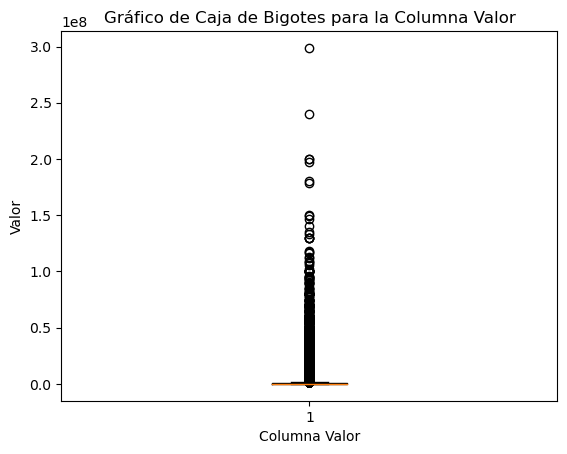

In [29]:
valores = df_4['Valor']

# Crear la gráfica de caja de bigotes
plt.boxplot(valores)
plt.xlabel('Columna Valor')
plt.ylabel('Valor')
plt.title('Gráfico de Caja de Bigotes para la Columna Valor')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features (X) y target (y)
X = df_4.drop('Valor', axis=1)  # Excluir la columna de 'Valor'
y = df_4['Valor']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = linear_model.predict(X_test)

# Calcular métricas de regresión (en este caso usamos r2_score y mean_squared_error)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Coeficiente de determinación (R2):', r2)
print('Error cuadrático medio (MSE):', mse)

Coeficiente de determinación (R2): 0.07833234685193913
Error cuadrático medio (MSE): 6381951673921.161


<h3> 9.3.2 Arboles de decision </h3>

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Features (X) y target (y)
X = df_4.drop('Valor', axis=1)  # Excluir la columna de 'Valor'
y = df_4['Valor']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresión de Árbol de Decisiones
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = decision_tree_model.predict(X_test)

# Calcular métricas de regresión (en este caso usamos r2_score y mean_squared_error)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Coeficiente de determinación (R2):', r2)
print('Error cuadrático medio (MSE):', mse)

Coeficiente de determinación (R2): 0.8650183831393581
Error cuadrático medio (MSE): 934660289671.652


<h2> 10. Conclusiones </h2>

<li> Predicción de Transacciones Exitosas y con Error:
Aunque las métricas actuales reflejan una alta eficiencia en la predicción de transacciones exitosas y con error, se reconoce la oportunidad de futuros ajustes y refinamientos en el modelo de Regresión Logística para mejorar su desempeño y la confiabilidad de este. </li>
<p>
<li> Inferencia y Predicción del Tipo de Transacción:
Los resultados obtenidos utilizando Random Forest para inferir y predecir el tipo de transacción muestran áreas de mejora, lo cual indica la necesidad de futuras iteraciones para optimizar la precisión y el poder predictivo del modelo.</li>
<p>
<li> Predicción del Valor de Retiro:
Se observa que los modelos de Regresión Lineal y Árboles de Decisión, aunque útiles para predecir el valor de dinero a retirar, pueden beneficiarse de ajustes posteriores para mejorar la exactitud de las predicciones y, por ende, su utilidad en la toma de decisiones financieras. Debido al amplio rango en la columna "Valor" y a la alta presencia de outliers, se corren estos dos modelos con el fin de buscar un mismo valor, según el resultado de las metricas utilizadas el modelo de Árboles de Decisión tiene un mejor desempeño. </li>
<p>
<li> Enfoque en la Mejora Continua: Es fundamental tener en cuenta que las métricas actuales pueden no ser óptimas, pero se reconoce el potencial de realizar ajustes y refinamientos en los modelos. La mejora continua será un enfoque clave para optimizar la eficiencia y precisión de los modelos de machine learning en futuras iteraciones. </li>
<p>
<li> Optimización de Hiperparámetros:
La optimización de hiperparámetros y la exploración de diferentes configuraciones de modelo pueden ser estrategias efectivas para mejorar la calidad de las predicciones y abordar las limitaciones actuales en las métricas de desempeño. en el presente ejercicio se utilizaron herramientas para buscar un buen hiperparametro.</li>
<p>
<li> Validación Rigurosa y Evaluación Iterativa:
Se subraya la importancia de llevar a cabo una validación rigurosa y una evaluación iterativa de los modelos para comprender completamente sus fortalezas y debilidades, permitiendo así ajustes informados que conduzcan a mejoras sustanciales.
<p>
<li> Futuras Investigaciones y Desarrollo:
Se sugiere la exploración de enfoques avanzados y técnicas de modelado adicionales, así como la consideración de conjuntos de datos más amplios o características adicionales para enriquecer el análisis y lograr predicciones más precisas en futuras investigaciones.